### Additional test for section 3


In [2]:
# packages
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

from scipy import signal, fft
from scipy.optimize import brentq


In [5]:
# external function files
import functions, filters_func
import utils
from functions import signals_ex
from functions import amplitude_sampler
import amplitudeSampling

In [229]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [230]:
T = 1
t_range = np.linspace(0,T,1000)
q= functions.quantizer(5)

In [251]:
def amp_smp(func, T, q, xlim, k ):


    t_inst, q_idx = functions.amplitude_sampler(func, T, q)
    pulse_times = functions.decompose(t_inst, q_idx, T)
    x = np.linspace(0, T, 1000)  # time vector

    FS_complete = 0
    for i in range(len(pulse_times)):
        F_tmp = functions.FS(k, pulse_times[i][0], pulse_times[i][1], T, x, q.step * 2)
        FS_complete = FS_complete + F_tmp
    #----------------------------------------------------------------
    off = np.real(FS_complete) - q.quantize(func(x))

    plt.plot(x, FS_complete - off, label="Fouries series")
    plt.plot(x, func(x), label="Original signal")
    functions.plot_decomposition(functions.decompose(t_inst, q_idx, T), q, plot= True)
    plt.title("Fourier series reconstruction")
    plt.xlim(0, xlim)
    plt.legend()
    plt.grid()

    return FS_complete, FS_complete- off

#### Sin function

In [336]:
def sin_ampSmp(x):
    f0 = 1.2# Hz
    return 0.9 * np.sin(2 * np.pi * f0 * x)

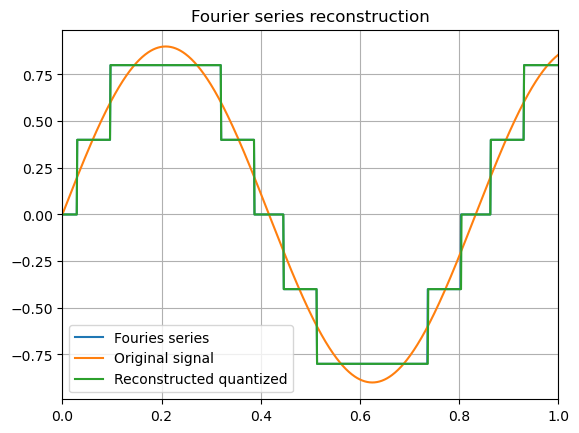

In [339]:
xlimit = 1
k = 200
T = 1
sin_FS, sin_FS_off= amp_smp(sin_ampSmp, T, q, xlimit, k)

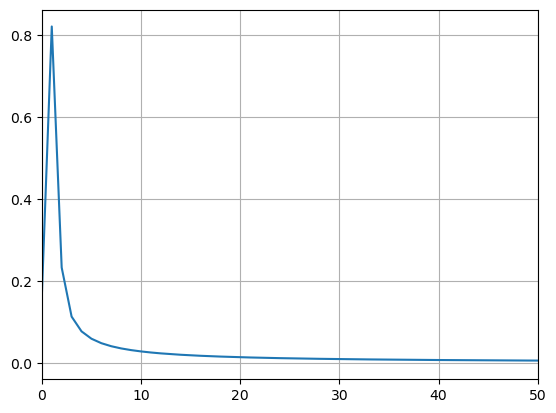

In [340]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
x = np.linspace(0,1,1000)
N = len(x)

# sample spacing
T = 1.0 / len(x)
x = np.linspace(0.0, N*T, N, endpoint=False)
y = sin_ampSmp(x)

yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.xlim(0,50)
plt.show()

Text(0.5, 1.0, 'Frequency analysis')

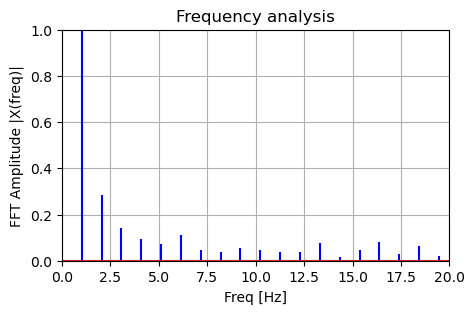

In [343]:
# fourier frequency analysis
freq_FS, X_FS = utils.fourier_analysis(sin_FS, fsmp = 1024)
#---------------------------------------------------------
plt.figure(figsize=(5, 3))
plt.stem(freq_FS, np.abs(X_FS), markerfmt='', linefmt='b' )
plt.xlabel('Freq [Hz]')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.grid()
plt.title("Frequency analysis")


#### Sawtooth

In [313]:
def sawtooth_ampSmp(x):
    f0 = 3 # Hz
    return 0.8* signal.sawtooth(2 * np.pi * f0 * x, 0.7)

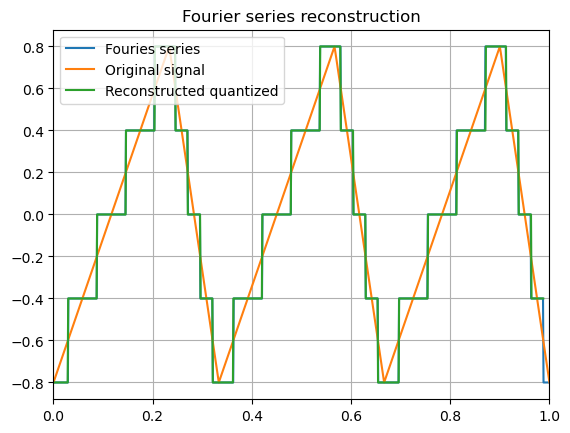

In [314]:
xlimit = 1
k = 200
sawtooth_FS, sawtooth_FS_off = amp_smp(sawtooth_ampSmp, T, q, xlimit, k=200)

T: 1.0
freq: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194

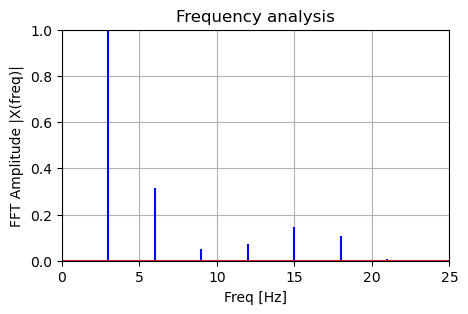

In [361]:
# fourier frequency analysis
freq_FS, X_FS = utils.fourier_analysis(sawtooth_FS, fsmp = 1000)
#---------------------------------------------------------
plt.figure(figsize=(5, 3))
plt.stem(freq_FS, np.abs(X_FS), markerfmt='', linefmt='b' )
plt.xlabel('Freq [Hz]')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 25)
plt.ylim(0, 1)
plt.title("Frequency analysis")
plt.grid()
plt.show()

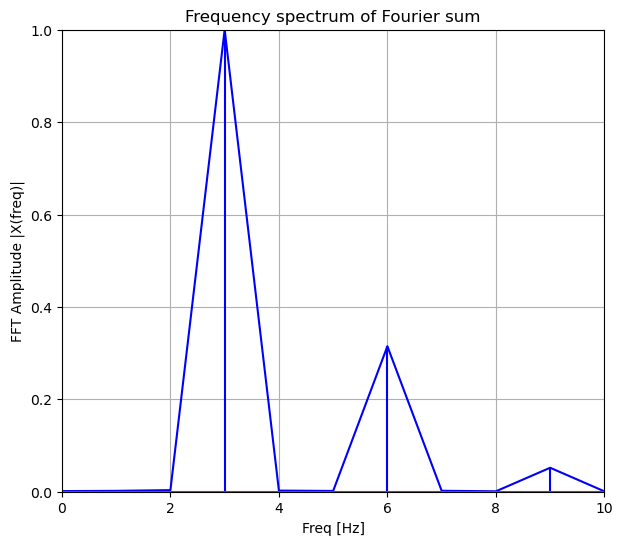

In [363]:
plt.figure(figsize=(7, 6))
utils.fourier_plot(freq_FS, X_FS, freq_lim=10, title="Frequency spectrum of Fourier sum")
plt.show()

# Polynomial

In [215]:
def poly_3(x):
    x = x-2
    return (x+3)*(x-2)**2*(x+1)**3

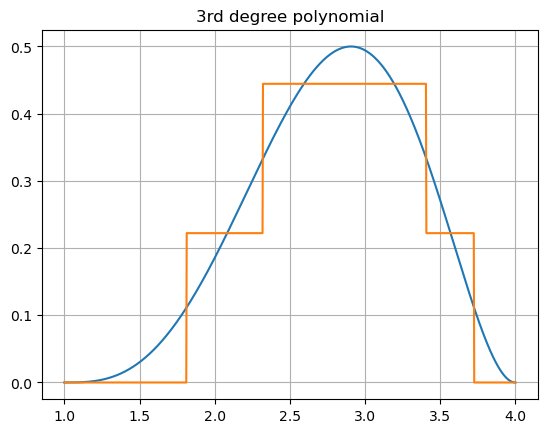

In [218]:
x =np.linspace(1,4, 1000)
q = functions.quantizer(9)
y = poly_3(x)/poly_3(x).max()/2
plt.plot(x, y)
plt.plot(x,q.quantize(poly_3(x)/poly_3(x).max()/2))
plt.title("3rd degree polynomial")
plt.grid()

#### Compound wave

In [354]:
def compound_ampSmp(x):
    f1 = 1
    f2 = 10
    return  0.3 * np.sin(2 * np.pi * f1 * x) + 0.6 * np.sin(2 * np.pi * f2 * x)

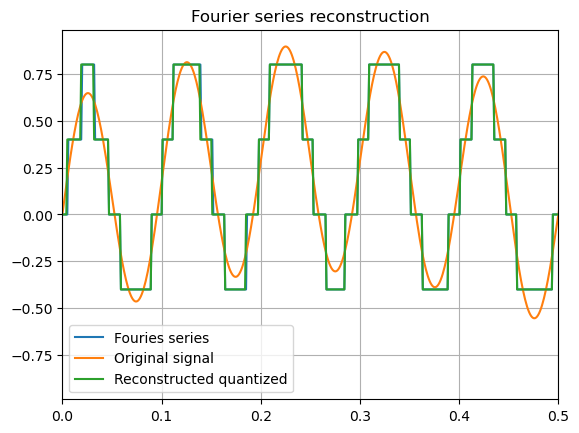

In [355]:
xlimit = 0.5
T=1
compound_FS, compound_FS_off = amp_smp(compound_ampSmp, T, q, xlimit,k=200)


T: 1.0
freq: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194

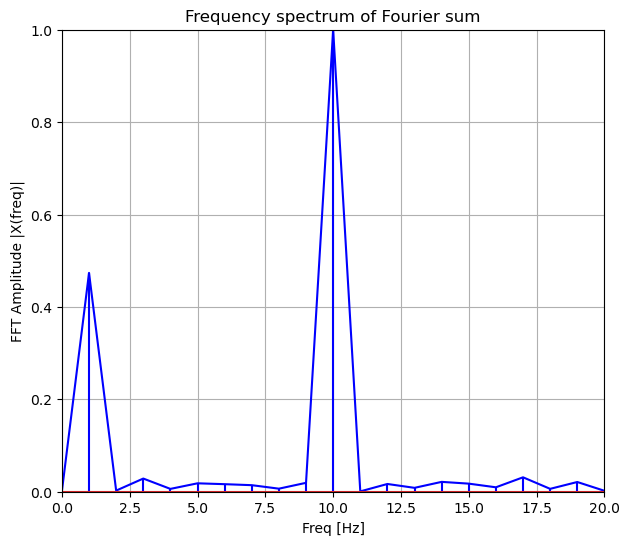

In [360]:
# fourier frequency analysis
freq_FS, X_FS = utils.fourier_analysis(compound_FS, fsmp = 1000)
#---------------------------------------------------------
plt.figure(figsize=(7, 6))
utils.fourier_plot(freq_FS, X_FS, freq_lim=20, title="Frequency spectrum of Fourier sum")
plt.show()